## kaggle過去コンペのdatasetをダウンロードするため、kaggle apiをpipでインストール

In [1]:
!pip install kaggle

     |████████████████████████████████| 59 kB 4.7 MB/s eta 0:00:011
  Created wheel for kaggle: filename=kaggle-1.5.10-py3-none-any.whl size=73269 sha256=9b43a91e5bf3c048869facc59ef8eaea335de944ea5bcd7f79cf8076dd9adfb4
  Stored in directory: /home/jupyter/.cache/pip/wheels/ea/c5/fe/7e7fb5b3d1f150fac96188949b3d83d375a4c9df16ba557e52
Successfully built kaggle


In [2]:
DATASET_PATH = '/home/jupyter/gcs/tf-test004'

In [47]:
#import the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
# import matplotlib.image as mplimg
from matplotlib.pyplot import imshow
import zipfile as zf
import os
import csv
import gc
import operator
import random
# from sklearn.cross_validation import train_test_split
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# from random import shuffle
# from IPython.display import Image
from pathlib import Path

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.utils import np_utils
import keras.backend as K
from keras.models import Sequential
from keras import optimizers

In [5]:
#load the training data
trainData = pd.read_csv(DATASET_PATH + "/train.csv")

In [8]:
trainData.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


train.csvの中に画像ファイル名とラベル名があるので、画像ファイル名をランダムに選び、画像ファイルを開く

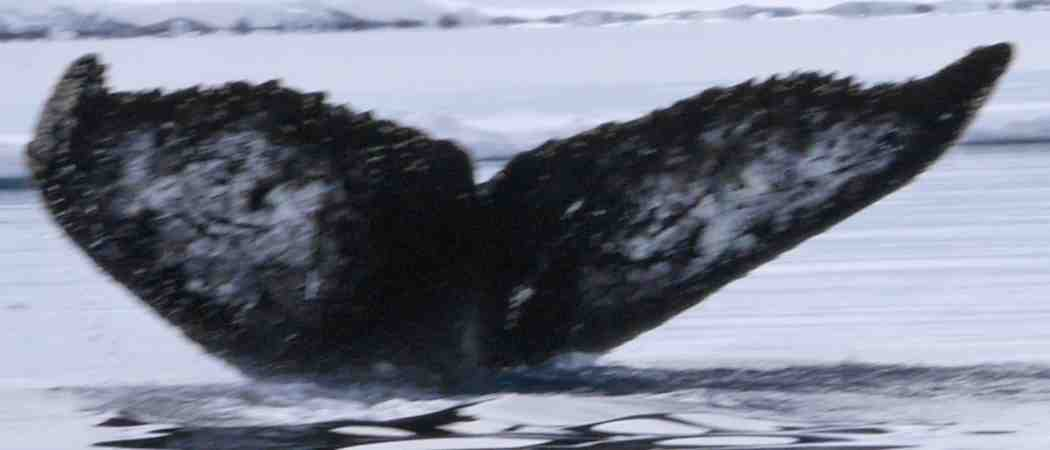

In [21]:
#show sample image
Image(filename=DATASET_PATH + "/train/train/"+random.choice(trainData['Image']))

In [39]:
def prepareImages(data, m, dataset):
    
    print("Preparing images")
    
    X_train = np.zeros((m, 100, 100, 3))
    
    count = 0
    
    for fig in data['Image']:
        #load images into images of size 100x100x3
        img = image.load_img(DATASET_PATH + dataset+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        #x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        X_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    count = 0
    
    print("Finished!")
            
    return X_train

In [48]:
def prepareY(Y):
    """
    文字列のラベルを数値のラベルに変換し、その後にonehot encodeする(行列)にする
    """
    values = array(Y)
    print(values.shape)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    print(integer_encoded)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    print(onehot_encoded)

    y = onehot_encoded
    print(y.shape)
    return y, label_encoder

In [44]:
Y = trainData['Id']

In [45]:
print("Shape Y-train: ", Y.shape)

Shape Y-train:  (9850,)


In [49]:
y, label_encoder = prepareY(Y)

(9850,)
[3741  310 3613 ... 2337  746 3088]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(9850, 4251)


# モデル作成

In [56]:
mod = Sequential()

mod.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = (100, 100, 3)))

mod.add(BatchNormalization(axis = 3, name = 'bn0'))
mod.add(Activation('relu'))

mod.add(MaxPooling2D((2, 2), name='max_pool'))
mod.add(Conv2D(64, (3, 3), strides = (1,1), name="conv1"))
mod.add(Activation('relu'))
mod.add(AveragePooling2D((3, 3), name='avg_pool'))

mod.add(Flatten())
mod.add(Dense(500, activation="relu", name='rl'))
mod.add(Dropout(0.8))
mod.add(Dense(4251, activation='softmax', name='sm'))

print(mod.output_shape)

#opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
mod.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

(None, 4251)


In [57]:
X = prepareImages(trainData, 9850, "/train/train")

Preparing images
Processing image:  1 ,  00022e1a.jpg
Processing image:  501 ,  0c64ae81.jpg
Processing image:  1001 ,  19546e12.jpg
Processing image:  1501 ,  27e1c585.jpg
Processing image:  2001 ,  34453b91.jpg
Processing image:  2501 ,  414cb204.jpg
Processing image:  3001 ,  4e7b614f.jpg
Processing image:  3501 ,  5b1823d1.jpg
Processing image:  4001 ,  68d47887.jpg
Processing image:  4501 ,  74f20dc3.jpg
Processing image:  5001 ,  81c129dd.jpg
Processing image:  5501 ,  8e84444c.jpg
Processing image:  6001 ,  9c8173f2.jpg
Processing image:  6501 ,  a899eaba.jpg
Processing image:  7001 ,  b5c23b76.jpg
Processing image:  7501 ,  c25a929e.jpg
Processing image:  8001 ,  cf839e92.jpg
Processing image:  8501 ,  dcfa710f.jpg
Processing image:  9001 ,  ea462ed5.jpg
Processing image:  9501 ,  f70aaa64.jpg
Finished!


In [62]:
X[:10]

array([[[[121.06099701, 108.22100067, 101.31999969],
         [114.06099701, 101.22100067,  94.31999969],
         [109.06099701,  96.22100067,  89.31999969],
         ...,
         [140.06100464, 127.22100067, 120.31999969],
         [141.06100464, 128.2210083 , 121.31999969],
         [142.06100464, 129.2210083 , 122.31999969]],

        [[ 33.06099701,  20.22100067,  13.31999969],
         [-37.93900299, -50.77899933, -57.68000031],
         [ 47.06099701,  34.22100067,  27.31999969],
         ...,
         [138.06100464, 125.22100067, 118.31999969],
         [146.06100464, 133.2210083 , 126.31999969],
         [151.06100464, 138.2210083 , 131.32000732]],

        [[ -1.93900299, -14.77899933, -21.68000031],
         [-67.93900299, -80.77899933, -87.68000031],
         [113.06099701, 100.22100067,  93.31999969],
         ...,
         [ 63.06099701,  50.22100067,  43.31999969],
         [117.06099701, 104.22100067,  97.31999969],
         [105.06099701,  92.22100067,  85.31999969]],

In [63]:
# 正規化
X /= 255

In [64]:
X[:10]

array([[[[ 0.47474901,  0.42439608,  0.39733333],
         [ 0.44729803,  0.3969451 ,  0.36988235],
         [ 0.42769018,  0.37733726,  0.35027451],
         ...,
         [ 0.54925884,  0.49890588,  0.47184314],
         [ 0.55318041,  0.50282748,  0.4757647 ],
         [ 0.55710198,  0.50674905,  0.47968627]],

        [[ 0.12965097,  0.07929804,  0.05223529],
         [-0.1487804 , -0.19913333, -0.22619608],
         [ 0.18455293,  0.1342    ,  0.10713725],
         ...,
         [ 0.5414157 ,  0.49106275,  0.464     ],
         [ 0.57278825,  0.52243533,  0.49537255],
         [ 0.5923961 ,  0.54204317,  0.51498042]],

        [[-0.00760393, -0.05795686, -0.08501961],
         [-0.26642746, -0.31678039, -0.34384314],
         [ 0.44337646,  0.39302353,  0.36596078],
         ...,
         [ 0.24729803,  0.1969451 ,  0.16988235],
         [ 0.45906273,  0.40870981,  0.38164706],
         [ 0.41200391,  0.36165098,  0.33458823]],

        ...,

        [[ 0.5923961 ,  0.54204317,  0

In [65]:
history = mod.fit(X, y, epochs=100, batch_size=100, verbose=1)
gc.collect()

Epoch 1/100
99/99 [==============================] - 16s 157ms/step - loss: 8.2004 - accuracy: 0.0784
Epoch 2/100
99/99 [==============================] - 15s 154ms/step - loss: 7.9385 - accuracy: 0.0822
Epoch 3/100
99/99 [==============================] - 15s 154ms/step - loss: 7.8656 - accuracy: 0.0822
Epoch 4/100
99/99 [==============================] - 15s 154ms/step - loss: 7.8094 - accuracy: 0.0822
Epoch 5/100
99/99 [==============================] - 15s 154ms/step - loss: 7.7339 - accuracy: 0.0822
Epoch 6/100
99/99 [==============================] - 15s 154ms/step - loss: 7.6301 - accuracy: 0.0822
Epoch 7/100
99/99 [==============================] - 15s 154ms/step - loss: 7.5175 - accuracy: 0.0822
Epoch 8/100
99/99 [==============================] - 15s 155ms/step - loss: 7.3469 - accuracy: 0.0822
Epoch 9/100
99/99 [==============================] - 15s 153ms/step - loss: 7.1555 - accuracy: 0.0824
Epoch 10/100
99/99 [==============================] - 15s 155ms/step - loss: 6.920

801